# Question how has inflation adjusted budget changed over time?
We would like to know how the mean inflation adjusted budget of a film has changed over time.

## Load the data
Below we import the necessary libraries and connect to the database.

In [1]:
import pandas as pd
import numpy as np
import cpi
import seaborn as sns
import matplotlib.pyplot as plt
from moviesdb import moviesdb as mdb

### Update the consumer price index library

In [2]:
#cpi.update()

### Connect to the database

In [3]:
db = mdb.MoviesDb()

In [4]:
query = """
SELECT start_year, production_budget
FROM budgets
"""
df = db.load_query_as_df(query)

## Question specific data cleaning
To ensure that consumer price index data is available, we restrict our analysis to movies released before 2019.

In [5]:
df = df.query('start_year <= 2018')

## Computations
Below we inflate production budgets to 2018 United States Dollars.

In [6]:
def inflate_to_2018(x):
    inflated = cpi.inflate(value=x[1], year_or_month=int(x[0]), to=2018)
    return inflated

In [7]:
df_adjusted = pd.DataFrame()
df_adjusted['start_year'] = df['start_year']
df_adjusted['adjusted_budget'] = df.apply(inflate_to_2018, axis=1)

## Data visualization
Below we produce a regression plot of the median inflation adjusted production budget in 2018 USD. 

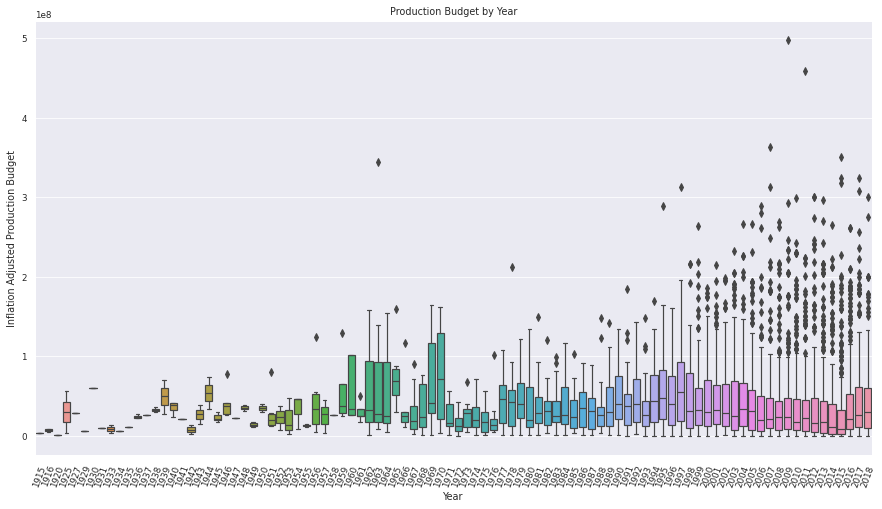

In [18]:
fig = plt.figure(figsize=(15,8));
sns.set_context('paper');
sns.set_style('darkgrid');
ax = sns.boxplot(x='start_year', y='adjusted_budget', data=df_adjusted);
ax.set(xlabel = 'Year', 
       ylabel = 'Inflation Adjusted Production Budget',
       title = 'Production Budget by Year',
      );
ax.set_xticklabels(ax.get_xticklabels(),rotation=70);


# Conclusion
We see that while the median budget is relatively stable over time, there are more large budget outliers beginning around the year 2000.